# Support Vector Machines 
## Fraud in Wine 

***

***
## Project Background

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor). Another common type of wine fraud involves counterfeiting by relabeling of infeior and cheaper wines to more expensive brands. 
<img src="wine.jpg">

## Project Goals


---
---

**Overall Goal: Your overall goal is to use the wine dataset shown below to develop a support vector machine (SVM) model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**



---
---

##  Explore the data:

**Run the cells below to import the libraries and load the dataset.**

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("wine_fraud.csv")

In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In the above dataset, the column of "quality" is the target column we are trying to predict. The values in the "quality" column are often called labels in supervised learning. To explore the labelled values in the "quality" column, we can use [`pandas.unique()`] to find out the unique values in the "quality" column.

Below are the unique values in our target column, the Quality Column.


In [38]:
print(pd.unique(df['quality']))

['Legit' 'Fraud']


A histogram (or countplot) to display the count per category of "Legit" vs "Fraud" in the column of "quality"**

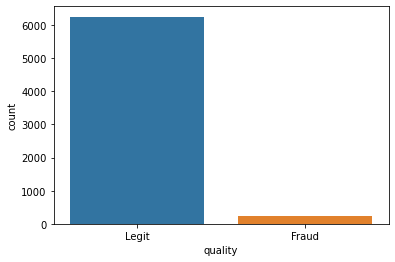

In [39]:
hist1 = sns.countplot(x='quality', data = df)

The target is unbalanced

Let's find out if there is a difference between red and white wine in terms of "Fraud" vs. "Legit" of the quality.<br> Below is a histogram that has the wine "type" on the x axis with the "hue" separating columns by "Fraud" vs. "Legit".**

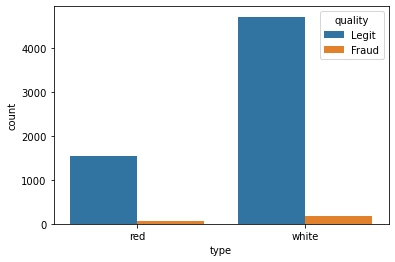

In [40]:
hist2 = sns.countplot(x='type', hue='quality', data = df)

 What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [41]:
reds = df[df["type"]=='red']
Fraud_reds = reds[reds['quality']=='Fraud']

In [42]:
whites = df[df["type"]=='white']
Fraud_whites = whites[whites['quality']=='Fraud']

In [43]:
fr=(len(Fraud_reds)/len(reds))*100
fw = (len(Fraud_whites)/len(whites))*100

In [44]:
print(f'Percentage of fraud in Red Wines is: {fr}')
print(f'Percentage of fraud in White Wines is: {fw}')

Percentage of fraud in Red Wines is: 3.9399624765478425
Percentage of fraud in White Wines is: 3.7362188648427925


What is the correlation between the various features and the "quality" column.**

Note:
* You can use `pandas.corr()` to calculate the whole correlation matrix, and then you can extract the `"Fraud"` column of the correlation matrix.

In [45]:
# This line of code is to map the string 'Legit' to 0 and the string 'Fraud' to 1
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [46]:
df.corr(method = 'pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Fraud
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.021794
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.151228
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.061789
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.048756
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.034499
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.085204
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.035252
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.016351
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.020107
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.034046


In [47]:
correlation = df.corr(method = 'pearson')

print(correlation["Fraud"])

#Below you can see that volatile acidity  has the most correlation with Fraud.

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64


----
## Machine Learning Model:


**Now, we convert the categorical variables in the column "type" from the strings "red" or "white" to dummy variables:**

A dummy variable is one that takes only the value 0 or 1 to indicate the absence or presence of some categorical effect.

In [24]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [25]:
df = df.drop('Fraud',axis=1)

 Separate out the data into feature matrix $\mathbf X$ (i.e., to drop the "quality" column) and target label $\mathbf y$ (i.e., the "quality" column)**.

In [26]:
X = df.drop('quality', axis=1)
y = df['quality']
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

** Perform a Train|Test split on the data, with a 10% test size.** 

Note: 
* Use `train_test_split` from the module `sklearn.model_selection`.


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=101)

** Scale the X_train (feature matrix of training dataset) and X_test (feature matrix of test dataset).**

**StandardScaler**: 

Standard Scaler transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. It arranges the data in a standard normal distribution. It is more useful in classification than regression.

Note:
* Create an scaler instance using `StandardScaler()` from the module `sklearn.preprocessing`.
* After creating a StandardScaler instance (with default parameters), use the method `fit_transform()` to scale the X_train; use the method `transform()` to scale the X_test.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


** Create an instance of a Support Vector Machine classifier.**

Note:
* Use Scikit-learn support vector machine classifier `SVC` from the module `sklearn.svm`.
* We already know that the classes (or labels) are unbalanced. To deal with this issue, we can adjust weights inversely proportional to class frequencies in the input data **by setting the argument `class_weight` in the SVC( ) call**. Check out the sklearn.svm.SVC documentation and look up how to set the `class_weight` argument.

In [29]:
from sklearn.svm import SVC
clf = SVC(class_weight = 'balanced')

**<br> Use a GridSearchCV to run a grid search to create a SVM model with the best C and gamma parameters.**

Note:
* Use `GridSearchCV` from the module `sklearn.model_selection`.
* Create an instance of GridSearchCV, where the estimator object (i.e., the argument **`estimator`) should set to be the SVC model created before**, and the parameter grid (i.e., the argument `param_griddict`) is suggested to set as `'C':[0.001,0.01,0.1,0.5,1], 'gamma':['scale','auto']`.
* Fit the training data to the models created by GridSearchCV. Make sure to use the **scaled** X_train (refer to Question 8) as the feature matrix for fitting.
* After finishing the fitting process, access the attribute `best_params_` of the GridSearchCV, print out the best C and gamma parameters.

In [30]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {'C':[0.001,0.01,0.1,0.5,1], 'gamma':['scale','auto']}
grid_model = GridSearchCV(clf,parameter_grid)
grid_model.fit(scaled_X_train,y_train)
grid_model.best_params_


{'C': 1, 'gamma': 'auto'}

**<br> Display the confusion matrix and classification report for your model.**

Note:
* Use `confusion_matrix`, `classification_report` from the module `sklearn.metrics`.
* After the grid search process , you have a SVM model with the best C and gamma parameters. Use the fitting model to make predictions over the test dataset. Make sure to use the **scaled** X_test
* Once you have the predictions over the test dataset, you can call the function `confusion_matrix( )` to obtain the confusion matrix. 
* Then you can display the classification report by calling the function `classification_report( )`. 

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
test_predictions = grid_model.predict(scaled_X_test)
confusion_matrix(y_test, test_predictions)
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



 How well does this model perform??. **

# Write your discussion here
    The model introduces a dataset comprising of 623 assumed legitimate and 27 assumed fraudulent wines. The data seems to suggest that it is accurate in determining whether a legitimate wine is legitimate, with the given accuracy of 84% but flawed in its approach to determining whether or not a fraudulent wine is fraudulent, due to insufficient datapoints to verify that claim. 
    
    The model correctly identified fraud wines as fraud 17 times (0.63*27) and correctly identified legitimate wines as legitimate 530 times (0.85*623). Just from observing this, we can see that the model is heavily biased towards identifying legit wines, resulting in the data for fraudulent wines lacking support. 
    
    I would suggest using more training data that would allow for increased support in detecting for fraudulent wines
    
    I would not suggest other people use this model due to the poorly developed algorithm leading to skewed data with regards to the fraudulent wine being labelled as legitimate (recall rate being so low). The recall rate for the legitimate wine, was higher, but the model is far from perfect seeing as though it is only 85%.